In [1]:
# Read all .csv files in and aggregate them
import pandas as pd
import glob
import os

folder_path = '/Users/kenny/Downloads/FROG&SOUN&CRWV'
all_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Important parameters (ts_event, (action), (side), (depth), bid_px, ask_px, bid_sz, ask_sz, bid_ct, ask_ct)

combined_files = []

for file in all_files:
    df = pd.read_csv(file)
    df['ts_event'] = pd.to_datetime(df['ts_event'], errors='coerce')
    df = df.dropna(subset=['ts_event'])
    df['minute'] = df['ts_event'].dt.floor('T')
    price_cols = ['bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00',
                 'bid_px_01', 'ask_px_01', 'bid_sz_01', 'ask_sz_01',
                 'bid_px_02', 'ask_px_02', 'bid_sz_02', 'ask_sz_02',
                 'bid_px_03', 'ask_px_03', 'bid_sz_03', 'ask_sz_03',
                 'bid_px_04', 'ask_px_04', 'bid_sz_04', 'ask_sz_04',
                 'bid_px_05', 'ask_px_05', 'bid_sz_05', 'ask_sz_05',
                 'bid_px_06', 'ask_px_06', 'bid_sz_06', 'ask_sz_06',
                 'bid_px_07', 'ask_px_07', 'bid_sz_07', 'ask_sz_07',
                 'bid_px_08', 'ask_px_08', 'bid_sz_08', 'ask_sz_08',
                 'bid_px_09', 'ask_px_09', 'bid_sz_09', 'ask_sz_09']
    df_grouped = df.groupby('minute')[price_cols].mean().reset_index()
    combined_files.append(df_grouped)

full_df = pd.concat(combined_files, ignore_index=True)

In [2]:
full_df.shape

(24541, 41)

In [3]:
full_df.describe(include='all')

<ipython-input-3-ade51ceed394>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  full_df.describe(include='all')


,minute,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_px_02,...,bid_sz_07,ask_sz_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09
count,24541,24541.000000,24541.000000,24541.000000,24541.000000,24541.000000,24541.000000,24541.000000,24541.000000,24541.000000,...,24541.000000,24541.000000,24541.000000,24541.000000,24541.000000,24541.000000,24541.000000,24541.000000,24541.000000,24541.000000
unique,8190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-04-08 19:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2025-04-03 13:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2025-05-02 19:59:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,27.749173,27.818663,1067.993183,1029.547517,27.727399,27.841619,1885.421077,1781.825129,27.706615,...,1188.013594,1193.882617,27.560724,28.026138,1081.543435,1111.666831,27.530084,28.060741,1034.364472,1077.052244
std,NaN,14.726099,14.765796,2405.762819,2276.700956,14.716349,14.776932,3011.312486,3092.819394,14.707899,...,2623.836428,2503.623014,14.654152,14.856163,2763.426763,2560.151607,14.643285,14.870401,2827.998895,2614.083431
min,NaN,6.549283,6.561813,1.000000,1.000000,6.539283,6.571813,1.000000,1.000000,6.529283,...,1.000000,1.000000,6.469283,6.641813,1.000000,1.000000,6.459283,6.651813,1.000000,1.000000
25%,NaN,9.338484,9.349494,94.322314,96.918239,9.328484,9.359494,100.000000,100.110526,9.318484,...,116.571429,121.666667,9.258000,9.429494,120.608696,125.683871,9.248000,9.439494,124.500000,130.797619


In [4]:
full_df.head(10)

,minute,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_px_02,...,bid_sz_07,ask_sz_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09
0,2025-04-03 13:30:00+00:00,54.781888,54.976956,811.911631,160.387462,54.719781,55.047840,726.415408,191.393505,54.680672,...,815.585347,163.916163,54.516352,55.403134,903.216767,192.867069,54.490650,55.441677,536.885196,263.773414
1,2025-04-03 13:31:00+00:00,53.884744,54.025779,1226.214286,566.893712,53.856357,54.134532,709.585783,303.119617,53.830379,...,397.967191,355.833903,53.662604,54.903869,215.968216,388.613124,53.633677,54.988325,294.760082,342.333561
2,2025-04-03 13:32:00+00:00,53.463580,53.613768,109.329897,229.850984,53.419831,53.722727,251.989691,101.680412,53.386888,...,348.941893,523.976570,53.232231,54.934527,413.701031,374.802249,53.205979,55.071115,418.470478,346.663543
3,2025-04-03 13:33:00+00:00,54.179407,54.337296,239.298921,260.998459,54.132542,54.448035,264.640986,139.631741,54.084106,...,404.141757,416.741911,53.828228,55.266602,467.032357,155.497689,53.789076,55.318367,328.828968,151.355162
4,2025-04-03 13:34:00+00:00,54.317506,54.520465,292.286822,302.171835,54.263230,54.612506,571.503876,106.603359,54.224328,...,222.069767,329.228682,53.991809,55.226292,547.169251,442.263566,53.960775,55.278966,403.311370,349.023256
5,2025-04-03 13:35:00+00:00,54.846977,54.949395,129.417484,250.071895,54.809665,55.012263,132.728758,199.465686,54.772173,...,105.410948,318.607843,54.579028,55.354935,123.600490,172.504902,54.550253,55.388832,110.633987,201.571895
6,2025-04-03 13:36:00+00:00,55.581403,55.691484,203.495125,464.803359,55.540336,55.741750,225.331528,249.583965,55.508998,...,174.907367,337.346696,55.255737,56.087059,277.627844,599.901408,55.213115,56.140255,349.840195,362.503250
7,2025-04-03 13:37:00+00:00,55.837036,55.979745,168.649672,173.168973,55.777414,56.023649,193.906045,111.743627,55.729148,...,184.930808,388.562272,55.515441,56.336985,157.080845,151.066278,55.487669,56.383503,116.343044,131.151493
8,2025-04-03 13:38:00+00:00,56.156320,56.274049,343.602002,163.697460,56.120331,56.320354,183.115473,237.241724,56.091078,...,1154.953041,210.538106,55.928699,56.494018,859.915319,173.893764,55.902818,56.531617,2434.314858,330.751347
9,2025-04-03 13:39:00+00:00,55.705897,55.872754,398.541342,186.984399,55.649914,55.952886,237.637285,126.795632,55.611123,...,112.015601,204.184867,55.394360,56.370000,151.856474,229.871295,55.362293,56.402855,110.223089,246.858814


In [5]:
# Calculate Spread/Midprice
full_df['spread'] = full_df['ask_px_00'] - full_df['bid_px_00']
full_df['mid_price'] = (full_df['ask_px_00'] + full_df['bid_px_00']) / 2

full_df['imbalance'] = (full_df['bid_sz_00'] - full_df['ask_sz_00']) / (full_df['bid_sz_00'] + full_df['ask_sz_00'])
full_df['beta_t'] = full_df['spread'] / (full_df['bid_sz_00'] + full_df['ask_sz_00'])

full_df = full_df.replace([float('inf'), -float('inf')], pd.NA).dropna()

# Simulate market order execution and compute slippage.
import numpy as np

def compute_gtX(row, x, side='buy', levels=5):
    try:
        if side == 'buy':
            prices = [row[f'ask_px_0{i}'] for i in range(levels)]
            sizes = [row[f'ask_sz_0{i}'] for i in range(levels)]
        else:
            prices = [row[f'bid_px_0{i}'] for i in range(levels)]
            sizes = [row[f'bid_sz_0{i}'] for i in range(levels)]
        
        # Check for NaNs or missing values
        if any(pd.isnull(p) or pd.isnull(s) for p, s in zip(prices, sizes)):
            return np.nan

        remaining = x
        cost = 0
        for p, s in zip(prices, sizes):
            if remaining <= s:
                cost += p * remaining
                remaining = 0
                break
            else:
                cost += p * s
                remaining -= s
        
        if remaining > 0:
            return np.nan  # Not enough liquidity

        avg_price = cost / x
        # Check for mid-price components
        if pd.isnull(row['ask_px_00']) or pd.isnull(row['bid_px_00']):
            return np.nan
        mid_price = (row['ask_px_00'] + row['bid_px_00']) / 2
        slippage = avg_price - mid_price
        return slippage

    except KeyError:
        return np.nan  # Handles case where expected columns are missing

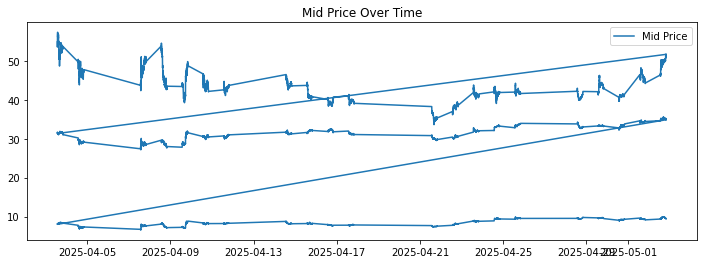

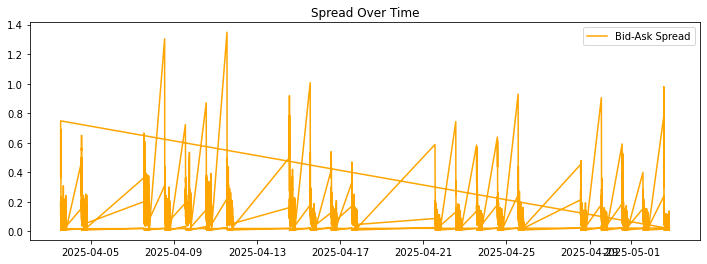

In [6]:
# Plot Spread/Midprice
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(full_df['minute'], full_df['mid_price'], label='Mid Price')
plt.title("Mid Price Over Time")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(full_df['minute'], full_df['spread'], label='Bid-Ask Spread', color='orange')
plt.title("Spread Over Time")
plt.legend()
plt.show()

In [7]:
# Testing intervals
import numpy as np

X_values = [5, 50, 100, 200, 500, 1000]

slippage_total = []

for X in X_values:
    slippages = []
    for idx, row in full_df.iterrows():
        if X <= row['ask_sz_00']:
            slippage = compute_gtX(row, X)
            slippages.append(slippage)
    avg_slippage = np.mean(slippages)
    slippage_total.append((X, avg_slippage))

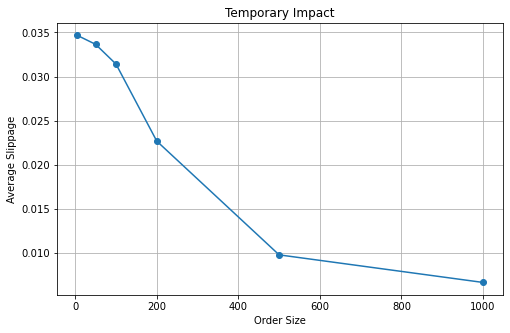

In [8]:
# Plot gt(X) vs X
import matplotlib.pyplot as plt
X_plot, gtX_plot = zip(*slippage_total)
plt.figure(figsize=(8,5))
plt.plot(X_plot, gtX_plot, marker='o')
plt.xlabel('Order Size')
plt.ylabel('Average Slippage')
plt.title('Temporary Impact')
plt.grid()
plt.show()

In [9]:
# Linear
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def fit_linear_beta(row, sizes=[10, 25, 50]):
    X, y = [], []
    for size in sizes:
        slip = compute_gtX(row, size)
        if not np.isnan(slip):
            X.append([size])
            y.append(slip)
    if len(X) >= 2:
        model = LinearRegression().fit(X, y)
        return model.coef_[0]
    return np.nan

full_df['beta_t'] = df.apply(lambda row: fit_linear_beta(row), axis=1)
full_df['imbalance'] = (full_df['bid_sz_00'] - full_df['ask_sz_00']) / (full_df['bid_sz_00'] + full_df['ask_sz_00'])
df_model = full_df[['spread', 'imbalance', 'mid_price', 'beta_t']].dropna()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features = ['spread', 'mid_price', 'imbalance']
X = df_model[features]
y = df_model['beta_t']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 8.225082751881156e-10
R² Score: 0.018680409660148944


In [11]:
# Polynomial (Based on linear modelling)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_y_pred = poly_model.predict(X_test_poly)

print("MSE:", mean_squared_error(y_test, poly_y_pred))
print("R²:", r2_score(y_test, poly_y_pred))

MSE: 8.099225630944066e-10
R²: 0.033696192733102315


In [12]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

Random Forest:
MSE: 8.1678901444858e-10
R²: 0.02550395511892778


In [13]:
'''
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Fit polynomial regression
poly_pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_pipeline.fit(X_train, y_train)

# Predict
df_model['beta_poly'] = poly_pipeline.predict(X)
'''

"\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.pipeline import make_pipeline\n\n# Fit polynomial regression\npoly_pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())\npoly_pipeline.fit(X_train, y_train)\n\n# Predict\ndf_model['beta_poly'] = poly_pipeline.predict(X)\n"

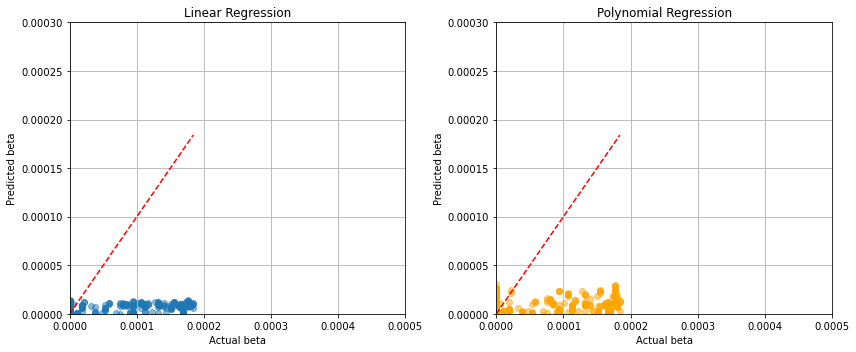

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlim(0, 0.0005)
plt.ylim(0, 0.0003)
plt.xlabel("Actual beta")
plt.ylabel("Predicted beta")
plt.title("Linear Regression")
plt.grid()

# Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, poly_y_pred, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlim(0, 0.0005)
plt.ylim(0, 0.0003)
plt.xlabel("Actual beta")
plt.ylabel("Predicted beta")
plt.title("Polynomial Regression")
plt.grid()

plt.tight_layout()
plt.show()

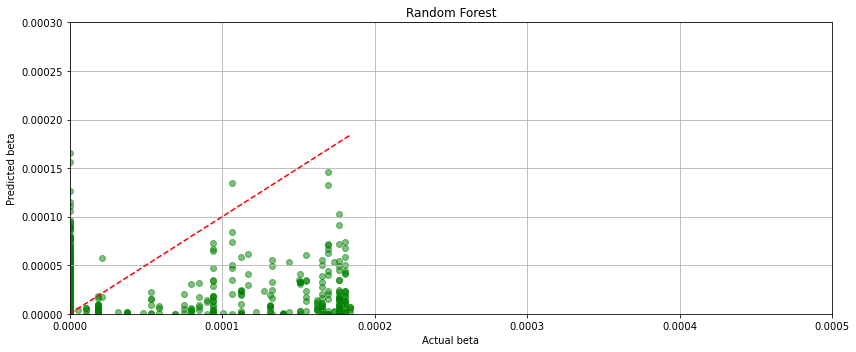

In [15]:
# Random Forest
plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual beta")
plt.ylabel("Predicted beta")
plt.title("Random Forest")

plt.xlim(0, 0.0005)
plt.ylim(0, 0.0003)
plt.grid()
plt.tight_layout()
plt.show()

                         minute       gtX
0     2025-04-03 13:30:00+00:00  0.097534
1     2025-04-03 13:31:00+00:00  0.070518
2     2025-04-03 13:32:00+00:00  0.075094
3     2025-04-03 13:33:00+00:00  0.078945
4     2025-04-03 13:34:00+00:00  0.101479
...                         ...       ...
24536 2025-05-02 19:55:00+00:00  0.005455
24537 2025-05-02 19:56:00+00:00  0.005493
24538 2025-05-02 19:57:00+00:00  0.005199
24539 2025-05-02 19:58:00+00:00  0.005473
24540 2025-05-02 19:59:00+00:00  0.005288

[24509 rows x 2 columns]
gtX Min: 0.00499999999994305 | Max: 0.690587128027687


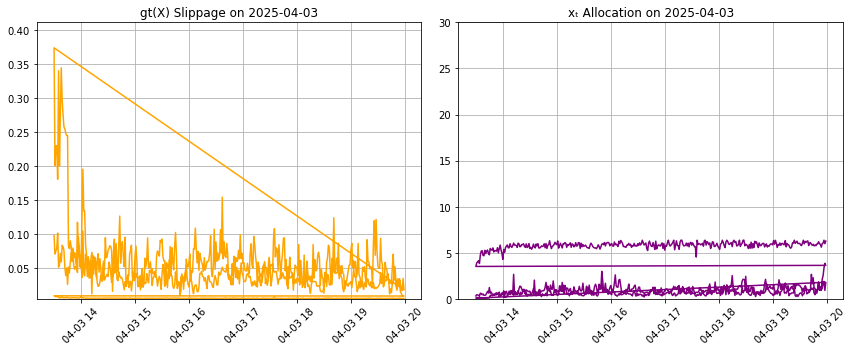

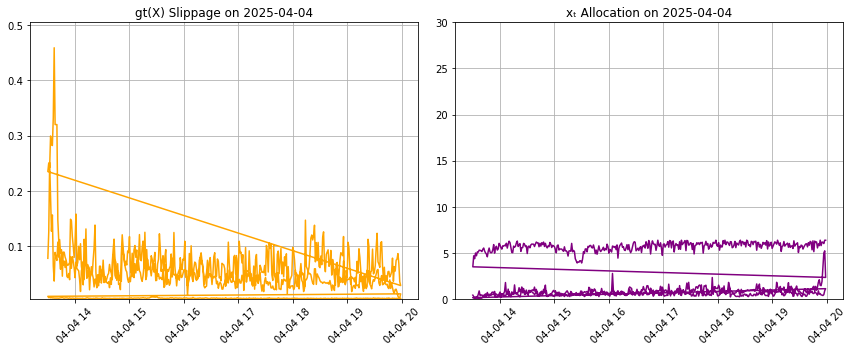

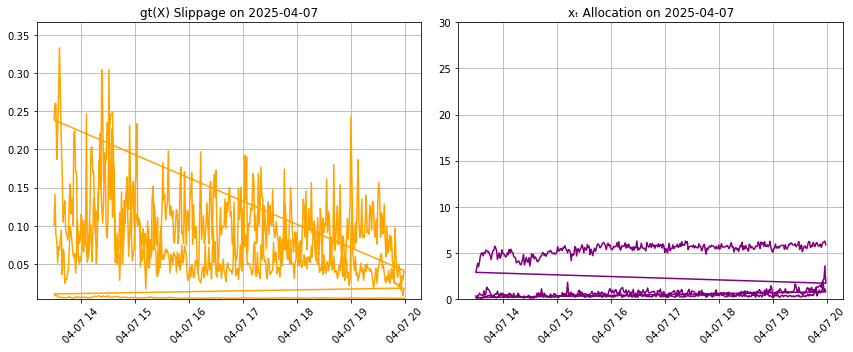

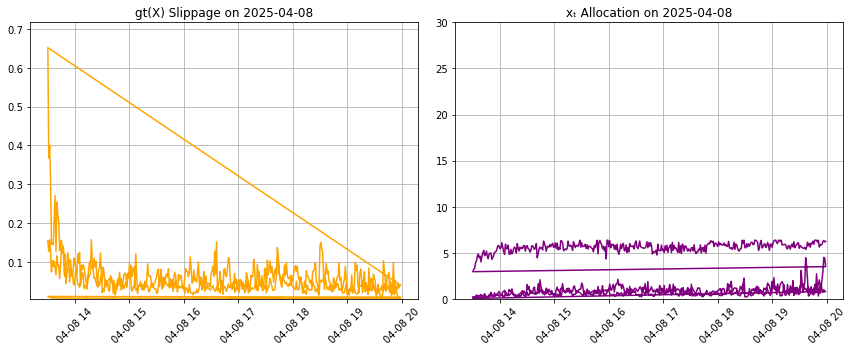

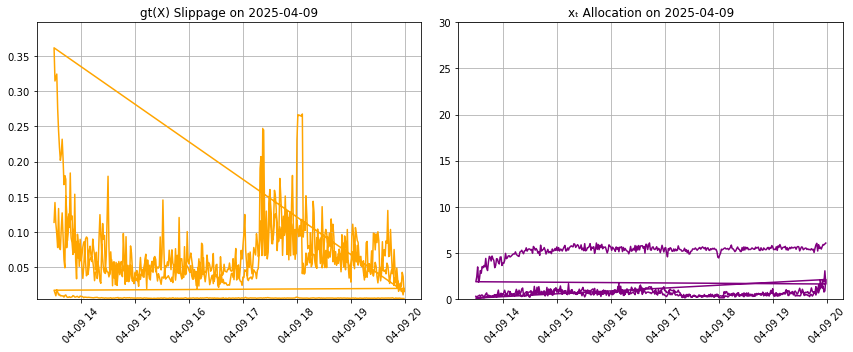

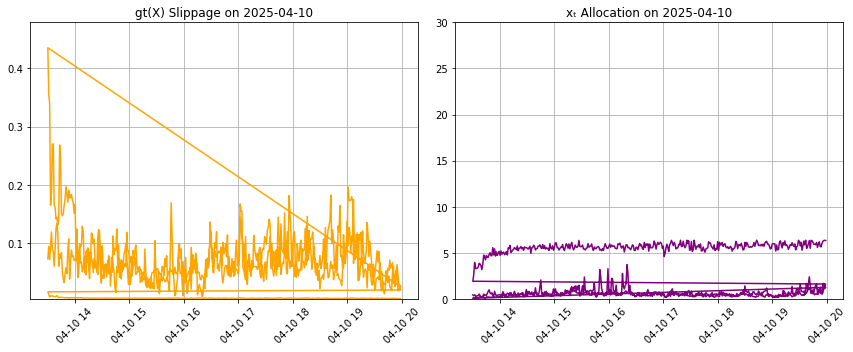

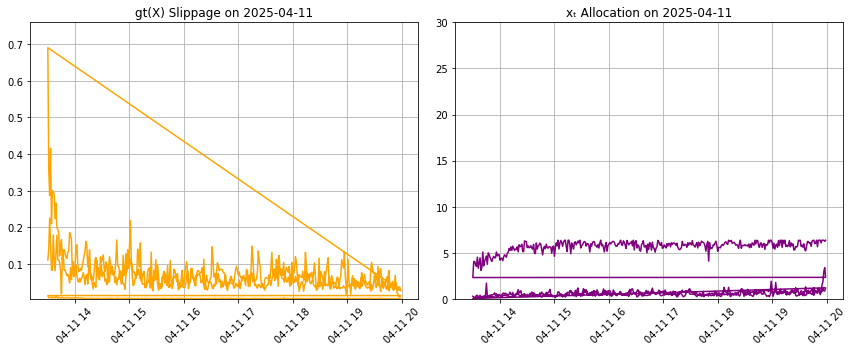

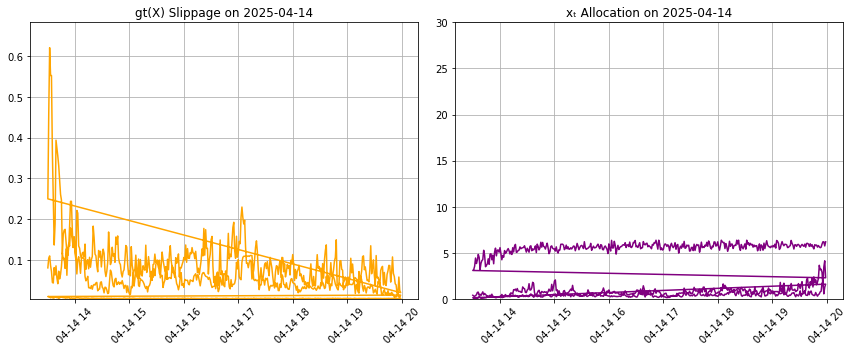

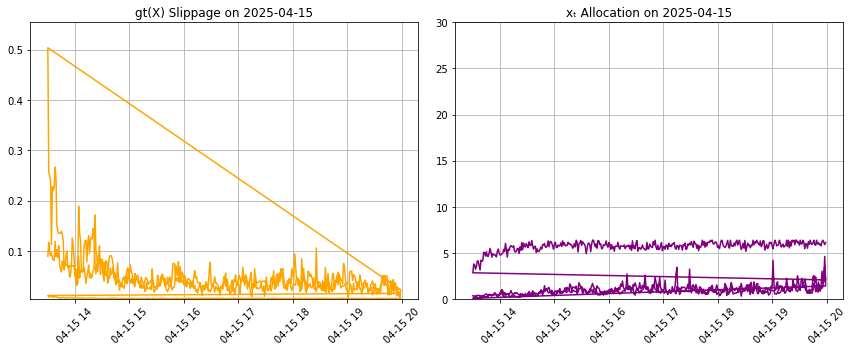

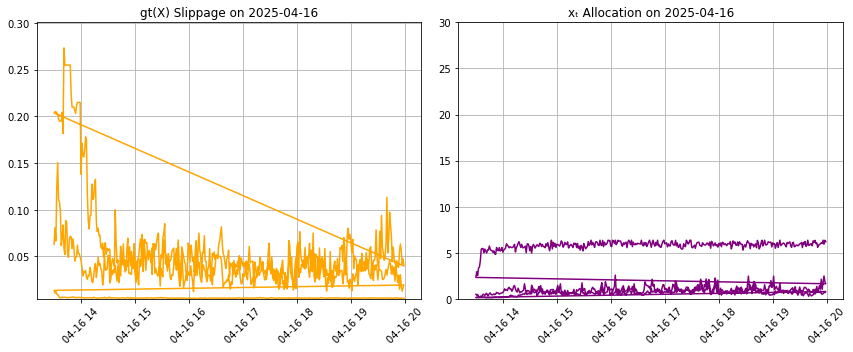

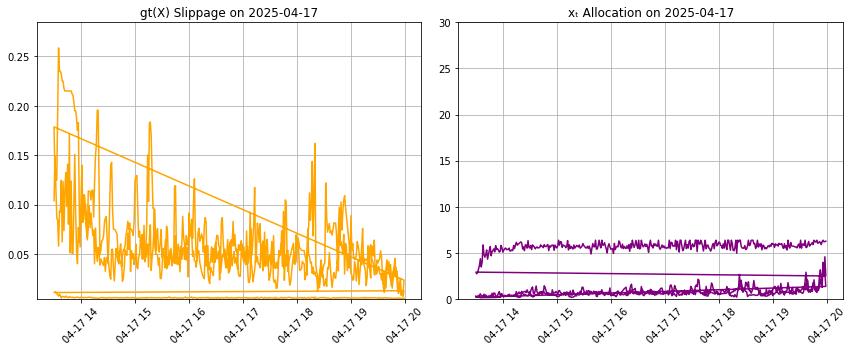

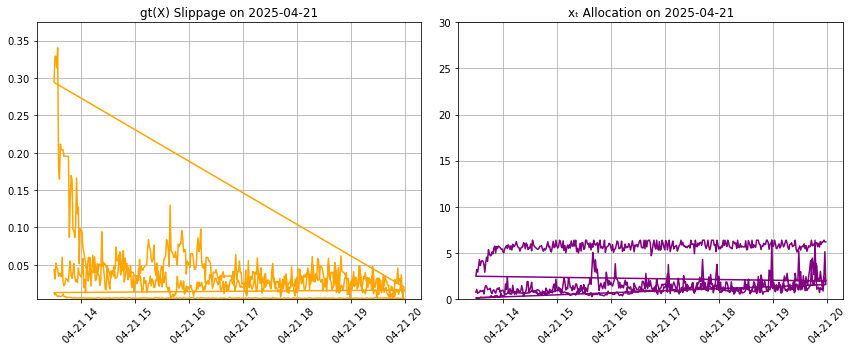

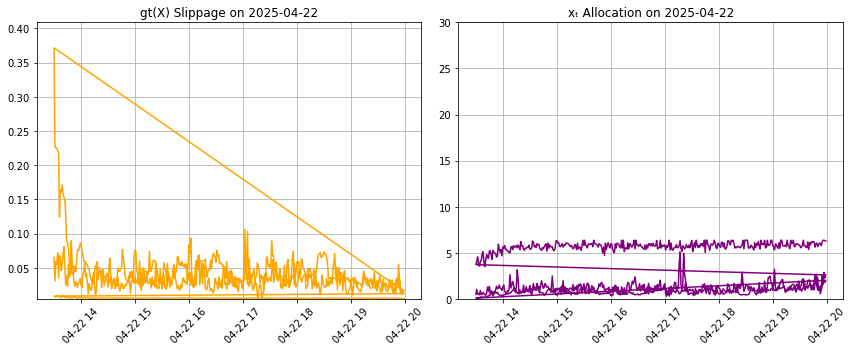

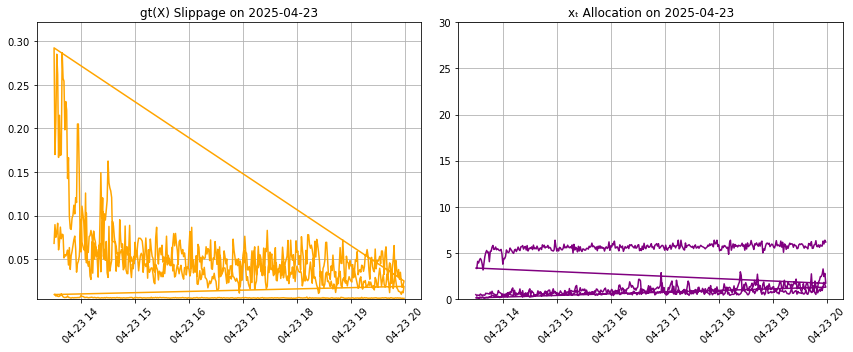

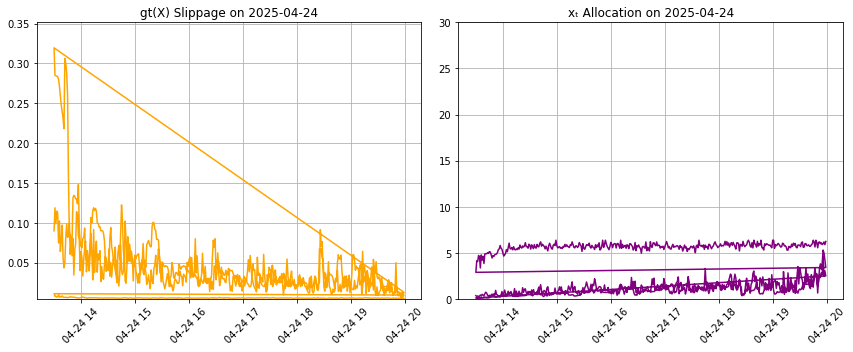

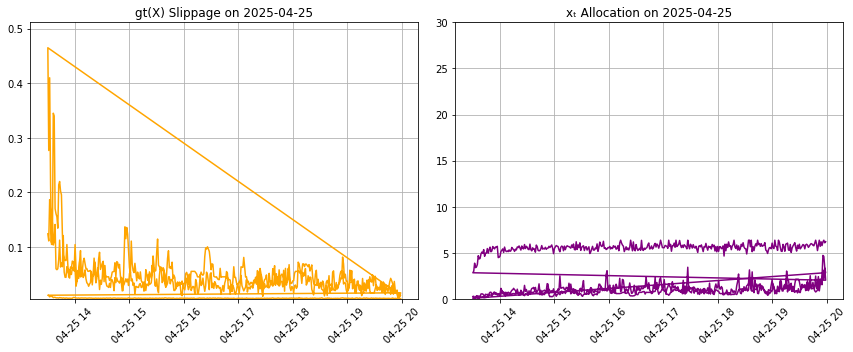

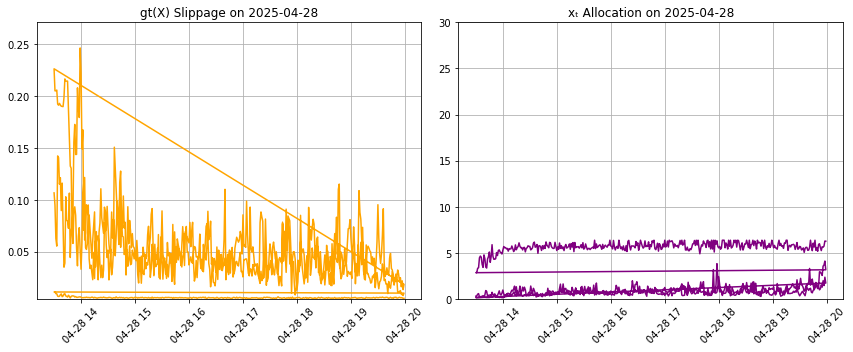

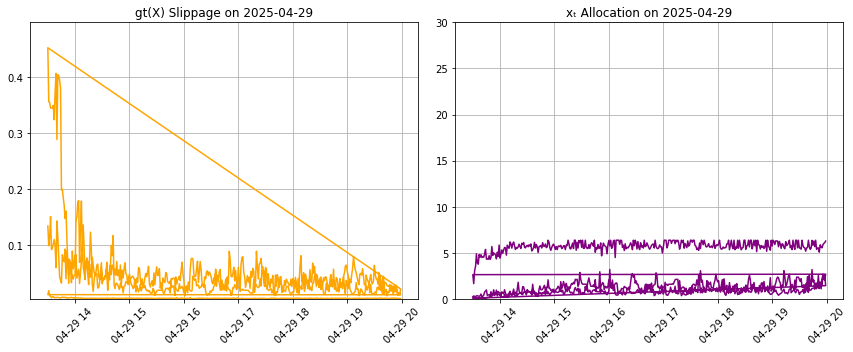

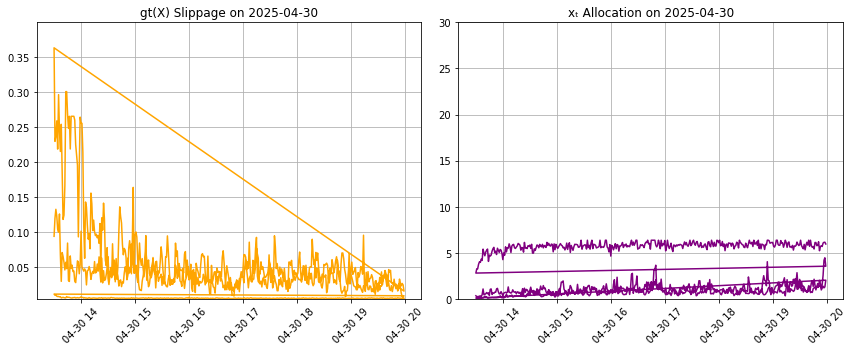

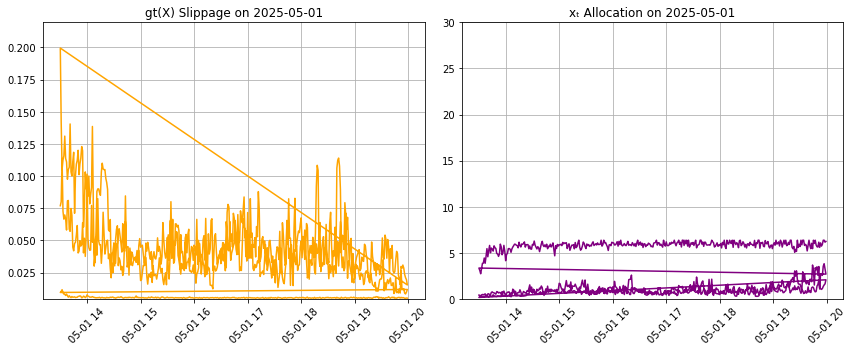

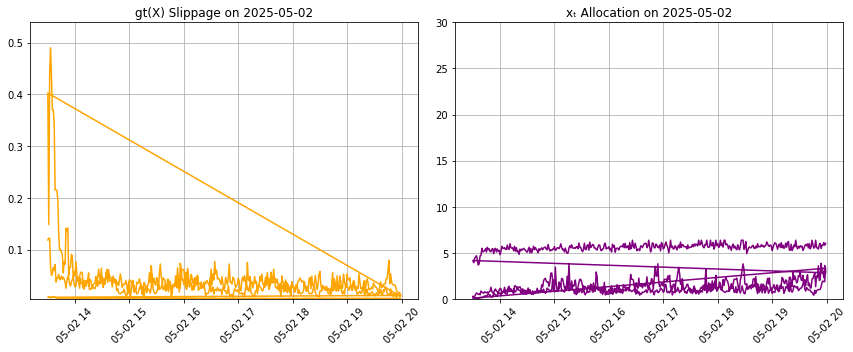

In [16]:
import matplotlib.pyplot as plt

# Parameters
S = 60000
X_order = 100
xt_ylim = (0, 30)

# Compute gt(X) and allocate xₜ
full_df['gtX'] = full_df.apply(lambda row: compute_gtX(row, X_order), axis=1)
full_df = full_df.dropna(subset=['gtX'])
full_df = full_df[full_df['gtX'] > 1e-8]
full_df['x_t'] = S * (1 / full_df['gtX']) / (1 / full_df['gtX']).sum()
full_df['date'] = full_df['minute'].dt.date

# Print summary stats
print(full_df[['minute', 'gtX']])
print("gtX Min:", full_df['gtX'].min(), "| Max:", full_df['gtX'].max())

# Plot gt(X) and xₜ for each day
for date, day_df in full_df.groupby('date'):
    if day_df['gtX'].isna().all():
        continue
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].plot(day_df['minute'], day_df['gtX'], color='orange')
    axs[0].set_title(f"gt(X) Slippage on {date}")
    axs[0].set_ylim(day_df['gtX'].min() * 0.9, day_df['gtX'].max() * 1.1)
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].grid()

    axs[1].plot(day_df['minute'], day_df['x_t'], color='purple')
    axs[1].set_title(f"xₜ Allocation on {date}")
    axs[1].set_ylim(xt_ylim)
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].grid()

    plt.tight_layout()
    plt.show()
